# Automatic classification of eclipsing binary stars using deep learning methods

## Experiment 2 
### Prediction

In [1]:
import numpy as np
import pandas as pd
import json
import pickle

from keras.utils import np_utils
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

np.random.seed(1234)

from ast import literal_eval
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scikitplot as skplt

    - Loading observation data

In [2]:
columns = ['id', 'morphology', 'passband', 'params', 'data', 'origin', 'period', 'target', 'epoch', 'meta']
df = pd.read_csv("../observed_lc.csv", sep="|", header=None)
df.columns = columns
df = df[["target", "morphology", "data", "meta"]]

processed_data = [literal_eval(_data)["flux"] for _data in df["data"]]
morphology = df[["morphology"]].values
objectt =  df[["target"]].values

df["original_morphology"] = [json.loads(_data)["morphology"] for _data in df["meta"]]
morphology = df["original_morphology"]

processed_data = np.array(processed_data, dtype=np.float32)

## Target by morphology - with semi-detached

In [3]:
target = []
for i in morphology:
    if i == 'over-contact':
        target.extend([0])
    if i == 'semi-detached':
         target.extend([1])
    if i == 'detached':
        target.extend([1])
target = np.array(target)
target = np_utils.to_categorical(target, 2)

    - load model - train on dataset after undersampling

In [4]:
classifier=load_model('model_under_sample.hdf5')

    - predict and evaluate

In [5]:
y_pred = classifier.predict(processed_data)
y_pred2 = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(target.argmax(axis=1), y_pred2.argmax(axis=1))
print("Confusion matrix: \n" + str(cm))
print("Classification report: \n" + classification_report(target.argmax(axis=1), y_pred2.argmax(axis=1)))

Confusion matrix: 
[[47  0]
 [ 2 51]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.96      0.98        53

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



    - print ROC curves

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


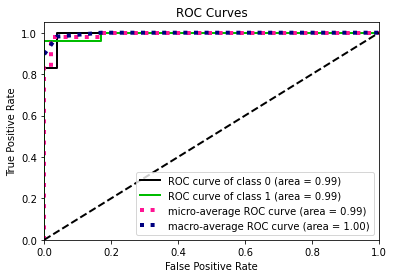

In [6]:
y_probas = classifier.predict(processed_data)
y_true = target.argmax(axis=1)

skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.savefig('roc_auc.png')
plt.show()

    -  plot incorrectly classified curves

No handles with labels found to put in legend.


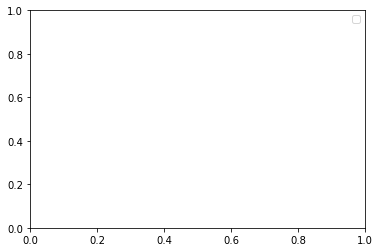

In [8]:
for j in range(len(y_pred2)):
    if  (y_pred2[j].argmax(axis=0) == 1) and (target[j].argmax(axis=0) == 0)  :
        print(j)
        plt.plot(processed_data[j], label = objectt[j] )
        
plt.legend(loc='upper right')       
plt.savefig('image.png')

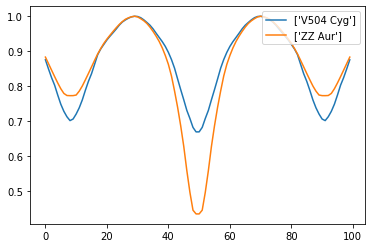

In [9]:
objekt=[]
for j in range(len(y_pred2)):
    if (y_pred2[j].argmax(axis=0) == 0) and (target[j].argmax(axis=0) == 1)   :
        plt.plot(processed_data[j], label = objectt[j])
        
plt.legend(loc='upper right')       
plt.savefig('image2.png')

## Target by morphology - without semi-detached

In [10]:
target = []
for i in morphology:
    if i == 'over-contact':
        target.extend([0])
    if i == 'detached':
        target.extend([1])
target = np.array(target)
target = np_utils.to_categorical(target, 2)

filtered_curves = []
curves=[]
for i in range(len(morphology)):
        if morphology[i] != 'semi-detached':
            filtered_curves.append(processed_data[i])
curves = filtered_curves
curves = np.array(curves, dtype=np.float32)

    - predict and evaluate

In [11]:
y_pred = classifier.predict(curves)
y_pred2 = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(target.argmax(axis=1), y_pred2.argmax(axis=1))
print("Confusion matrix: \n" + str(cm))
print("Classification report: \n" + classification_report(target.argmax(axis=1), y_pred2.argmax(axis=1)))

Confusion matrix: 
[[47  0]
 [ 0 39]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        39

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



    - print ROC curves

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


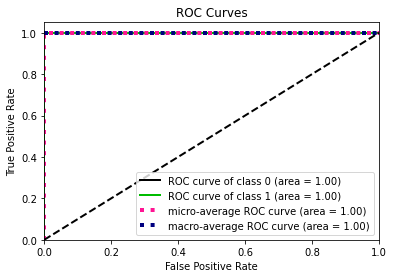

In [12]:
y_probas = classifier.predict(curves)
y_true = target.argmax(axis=1)

skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.savefig('auc3.png')
plt.show()